In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 214MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 106MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 42.8ms
Speed: 2.6ms preprocess, 42.8ms inference, 279.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
#change to ur roboflow code
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0WM88f3litPdNn9e5xxA")
project = rf.workspace("rf100-vl").project("invoice-processing-nl2cz-d87if-be5rs-wkgh")
version = project.version(1)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 101.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to invoice-processing-nl2cz-d87if-be5rs-wkgh-1 in yolov8:: 100%|██████████| 220/220 [00:00<00:00, 9523.95it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 37.6MB/s]
New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

In [ ]:
import os
print(os.listdir(dataset.location))

['README.roboflow.txt', 'valid', 'README.dataset.txt', 'train', 'test', 'data.yaml']


/content


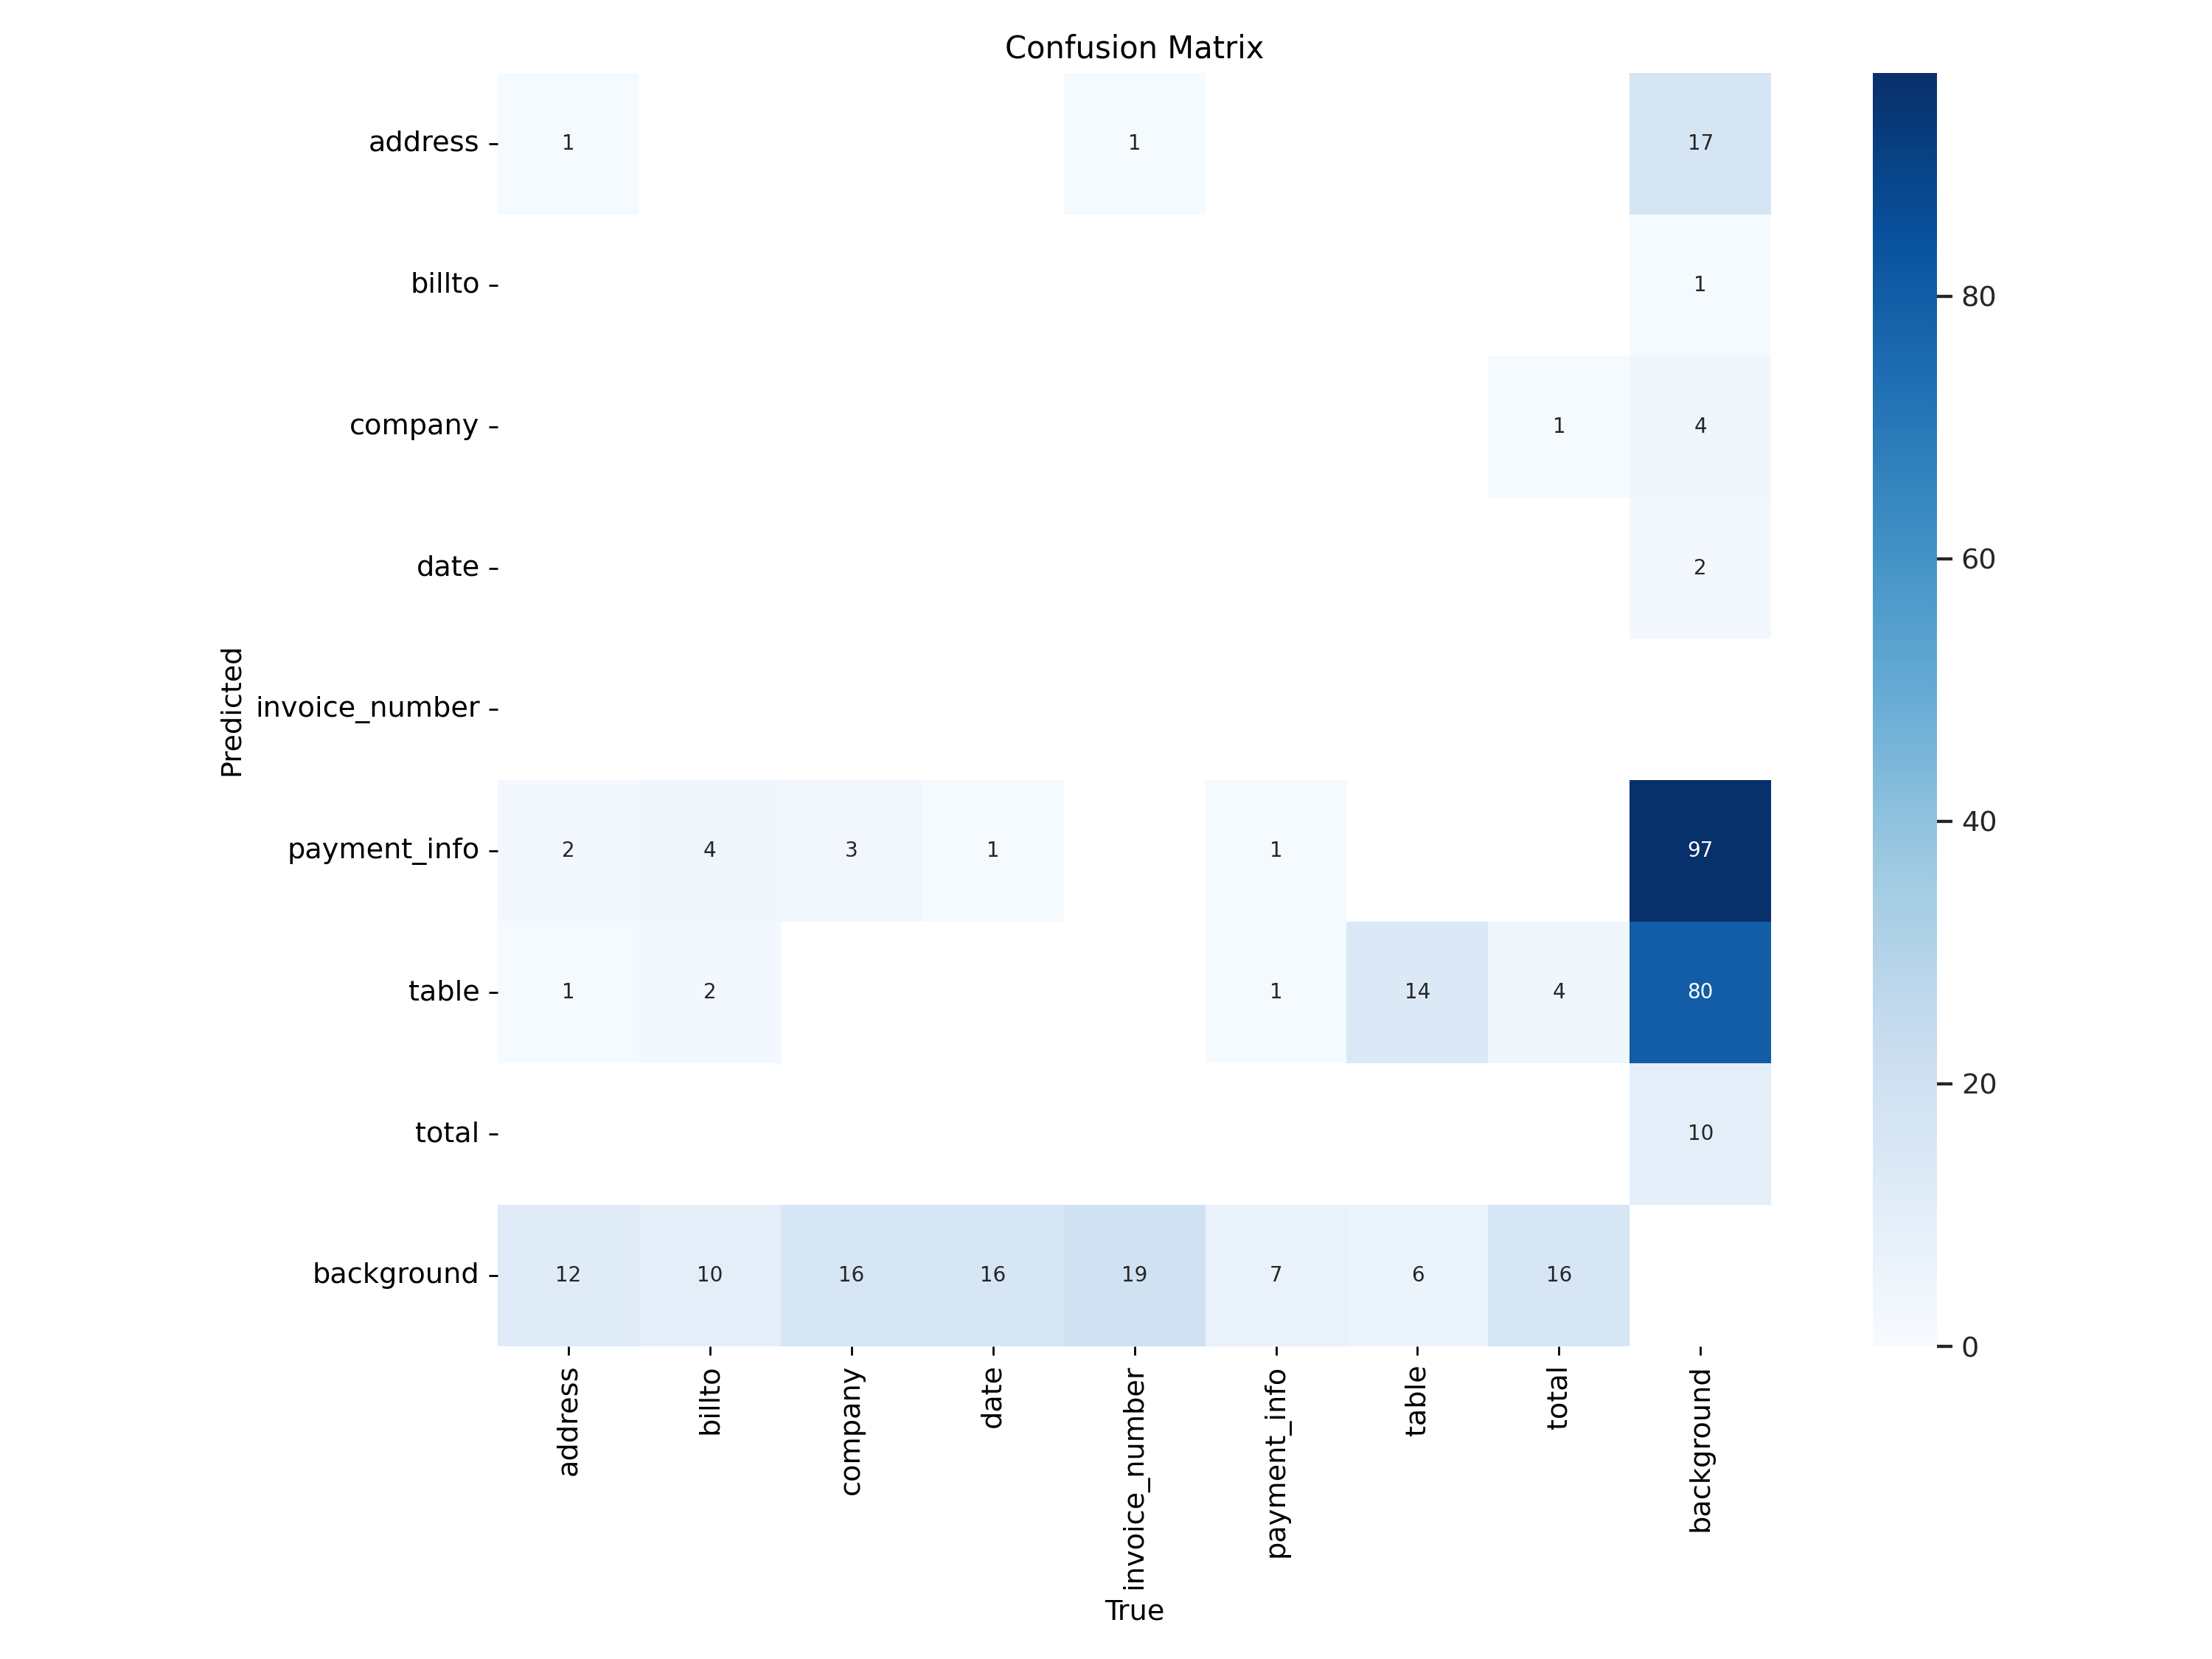

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


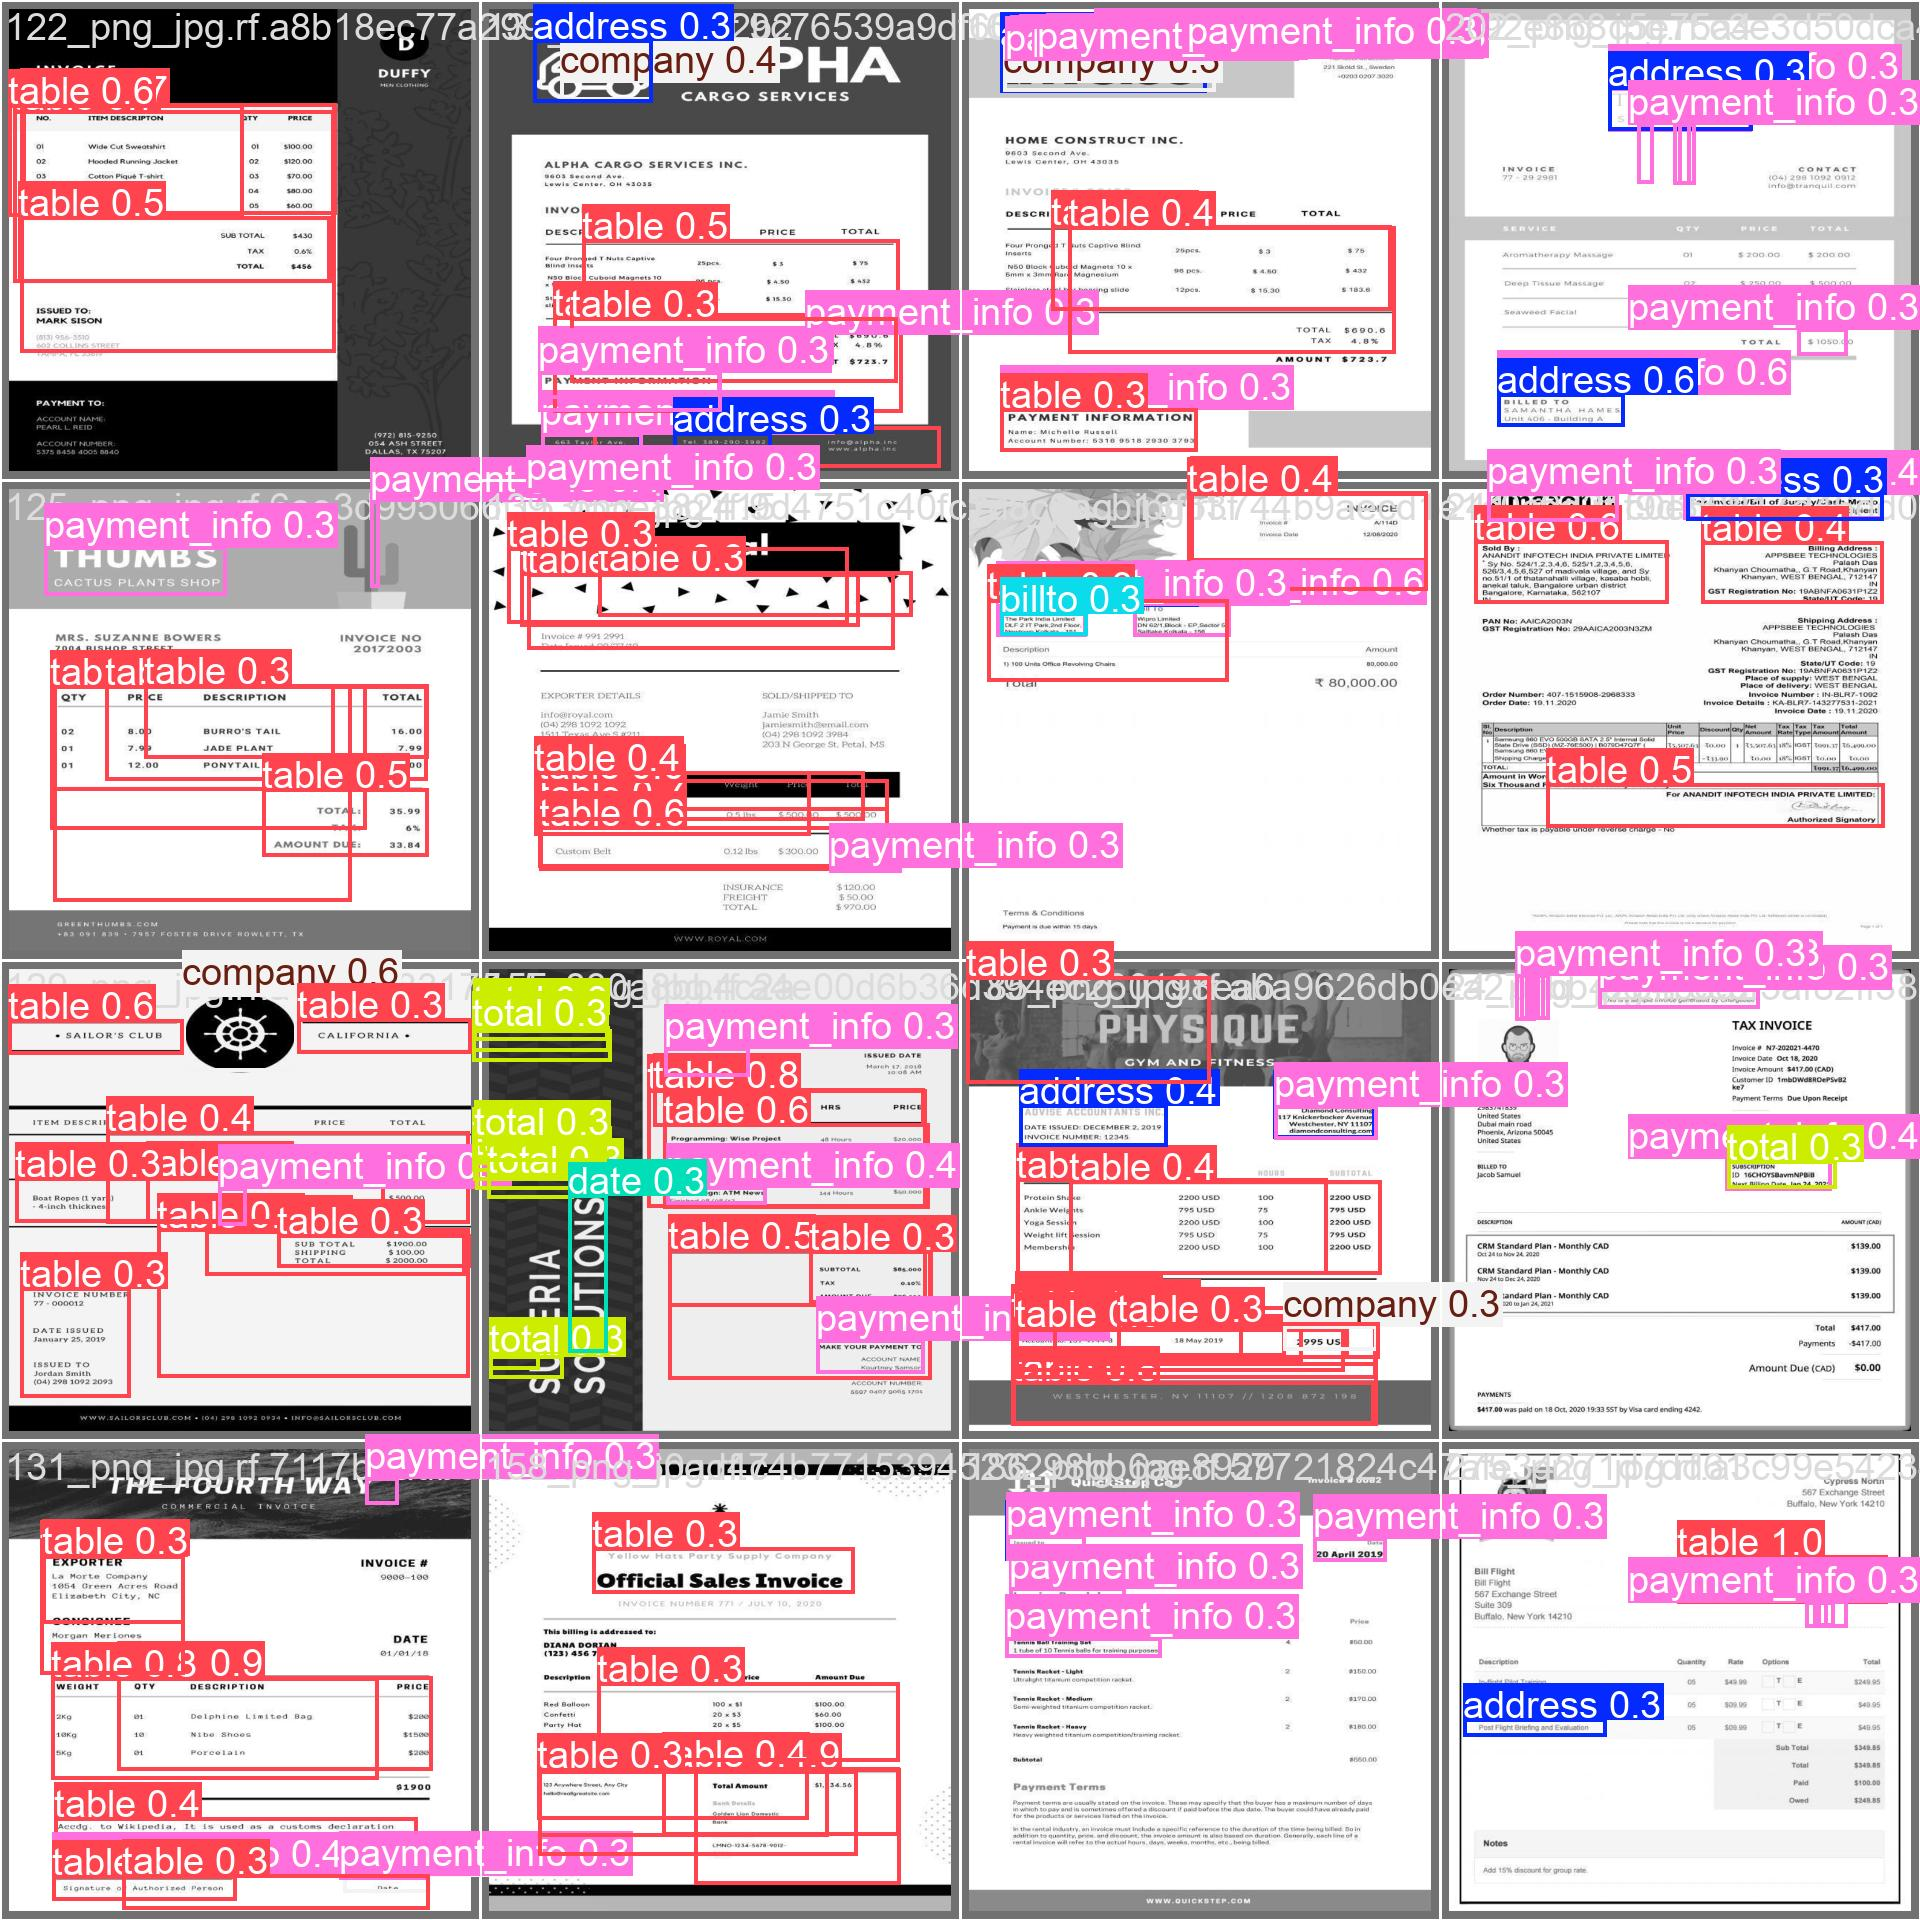

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.32it/s]
                   all         20        138      0.293      0.119     0.0446     0.0211
               address         15         16      0.171      0.188      0.125     0.0597
                billto         16         16          1          0          0          0
               company         17         19          0          0          0          0
                  date         14         17          0          0          0          0
        invoice_number         20         20          1          0          0          0

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/20 /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/images/122_png_jpg.rf.a8b18ec77a299c5d1661902b23108551.jpg: 800x800 4 tables, 22.3ms
image 2/20 /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/images/125_png_jpg.rf.6ee3d995066f153f55e88241523ca30f.jpg: 800x800 1 address, 2 payment_infos, 6 tables, 22.4ms
image 3/20 /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/images/129_png_jpg.rf.a6050483175e5a830a8bb4c2adaf5e15.jpg: 800x800 1 company, 12 tables, 22.3ms
image 4/20 /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/images/131_png_jpg.rf.7117b1adbcaca294fdf60ad47fbd36e1.jpg: 800x800 1 address, 1 payment_info, 4 tables, 22.3ms
image 5/20 /content/datasets/invoice-processing-nl2cz-d87if-be5rs-wkgh-1/valid/images/137_png_jp